# IRAT Figures

In [1]:
# basic imports
import os 
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300

def save_fig(filename, AXIS=False):
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    if not AXIS:
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True) 
    return

In [2]:
df = pd.read_csv('results/irat_average_qdistances.csv')

# filter by positive average qdistances
df = df[(df['HA Average Qdistance'] > 0) & (df['NA Average Qdistance'] > 0)]
df.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance
Potential Emergence Estimate,1.000000,0.824825,0.123761,0.127582,-0.447636,-0.686279,-0.703158
Potential Impact Estimate,0.824825,1.000000,-0.274266,-0.271986,-0.142216,-0.549054,-0.465714
HA Qnet Sample,0.123761,-0.274266,1.000000,0.999921,-0.449142,-0.250625,-0.384287
NA Qnet Sample,0.127582,-0.271986,0.999921,1.000000,-0.451228,-0.256785,-0.389699
HA Average Qdistance,-0.447636,-0.142216,-0.449142,-0.451228,1.000000,0.412533,0.747944
NA Average Qdistance,-0.686279,-0.549054,-0.250625,-0.256785,0.412533,1.000000,0.913163
Both Average Qdistance,-0.703158,-0.465714,-0.384287,-0.389699,0.747944,0.913163,1.000000


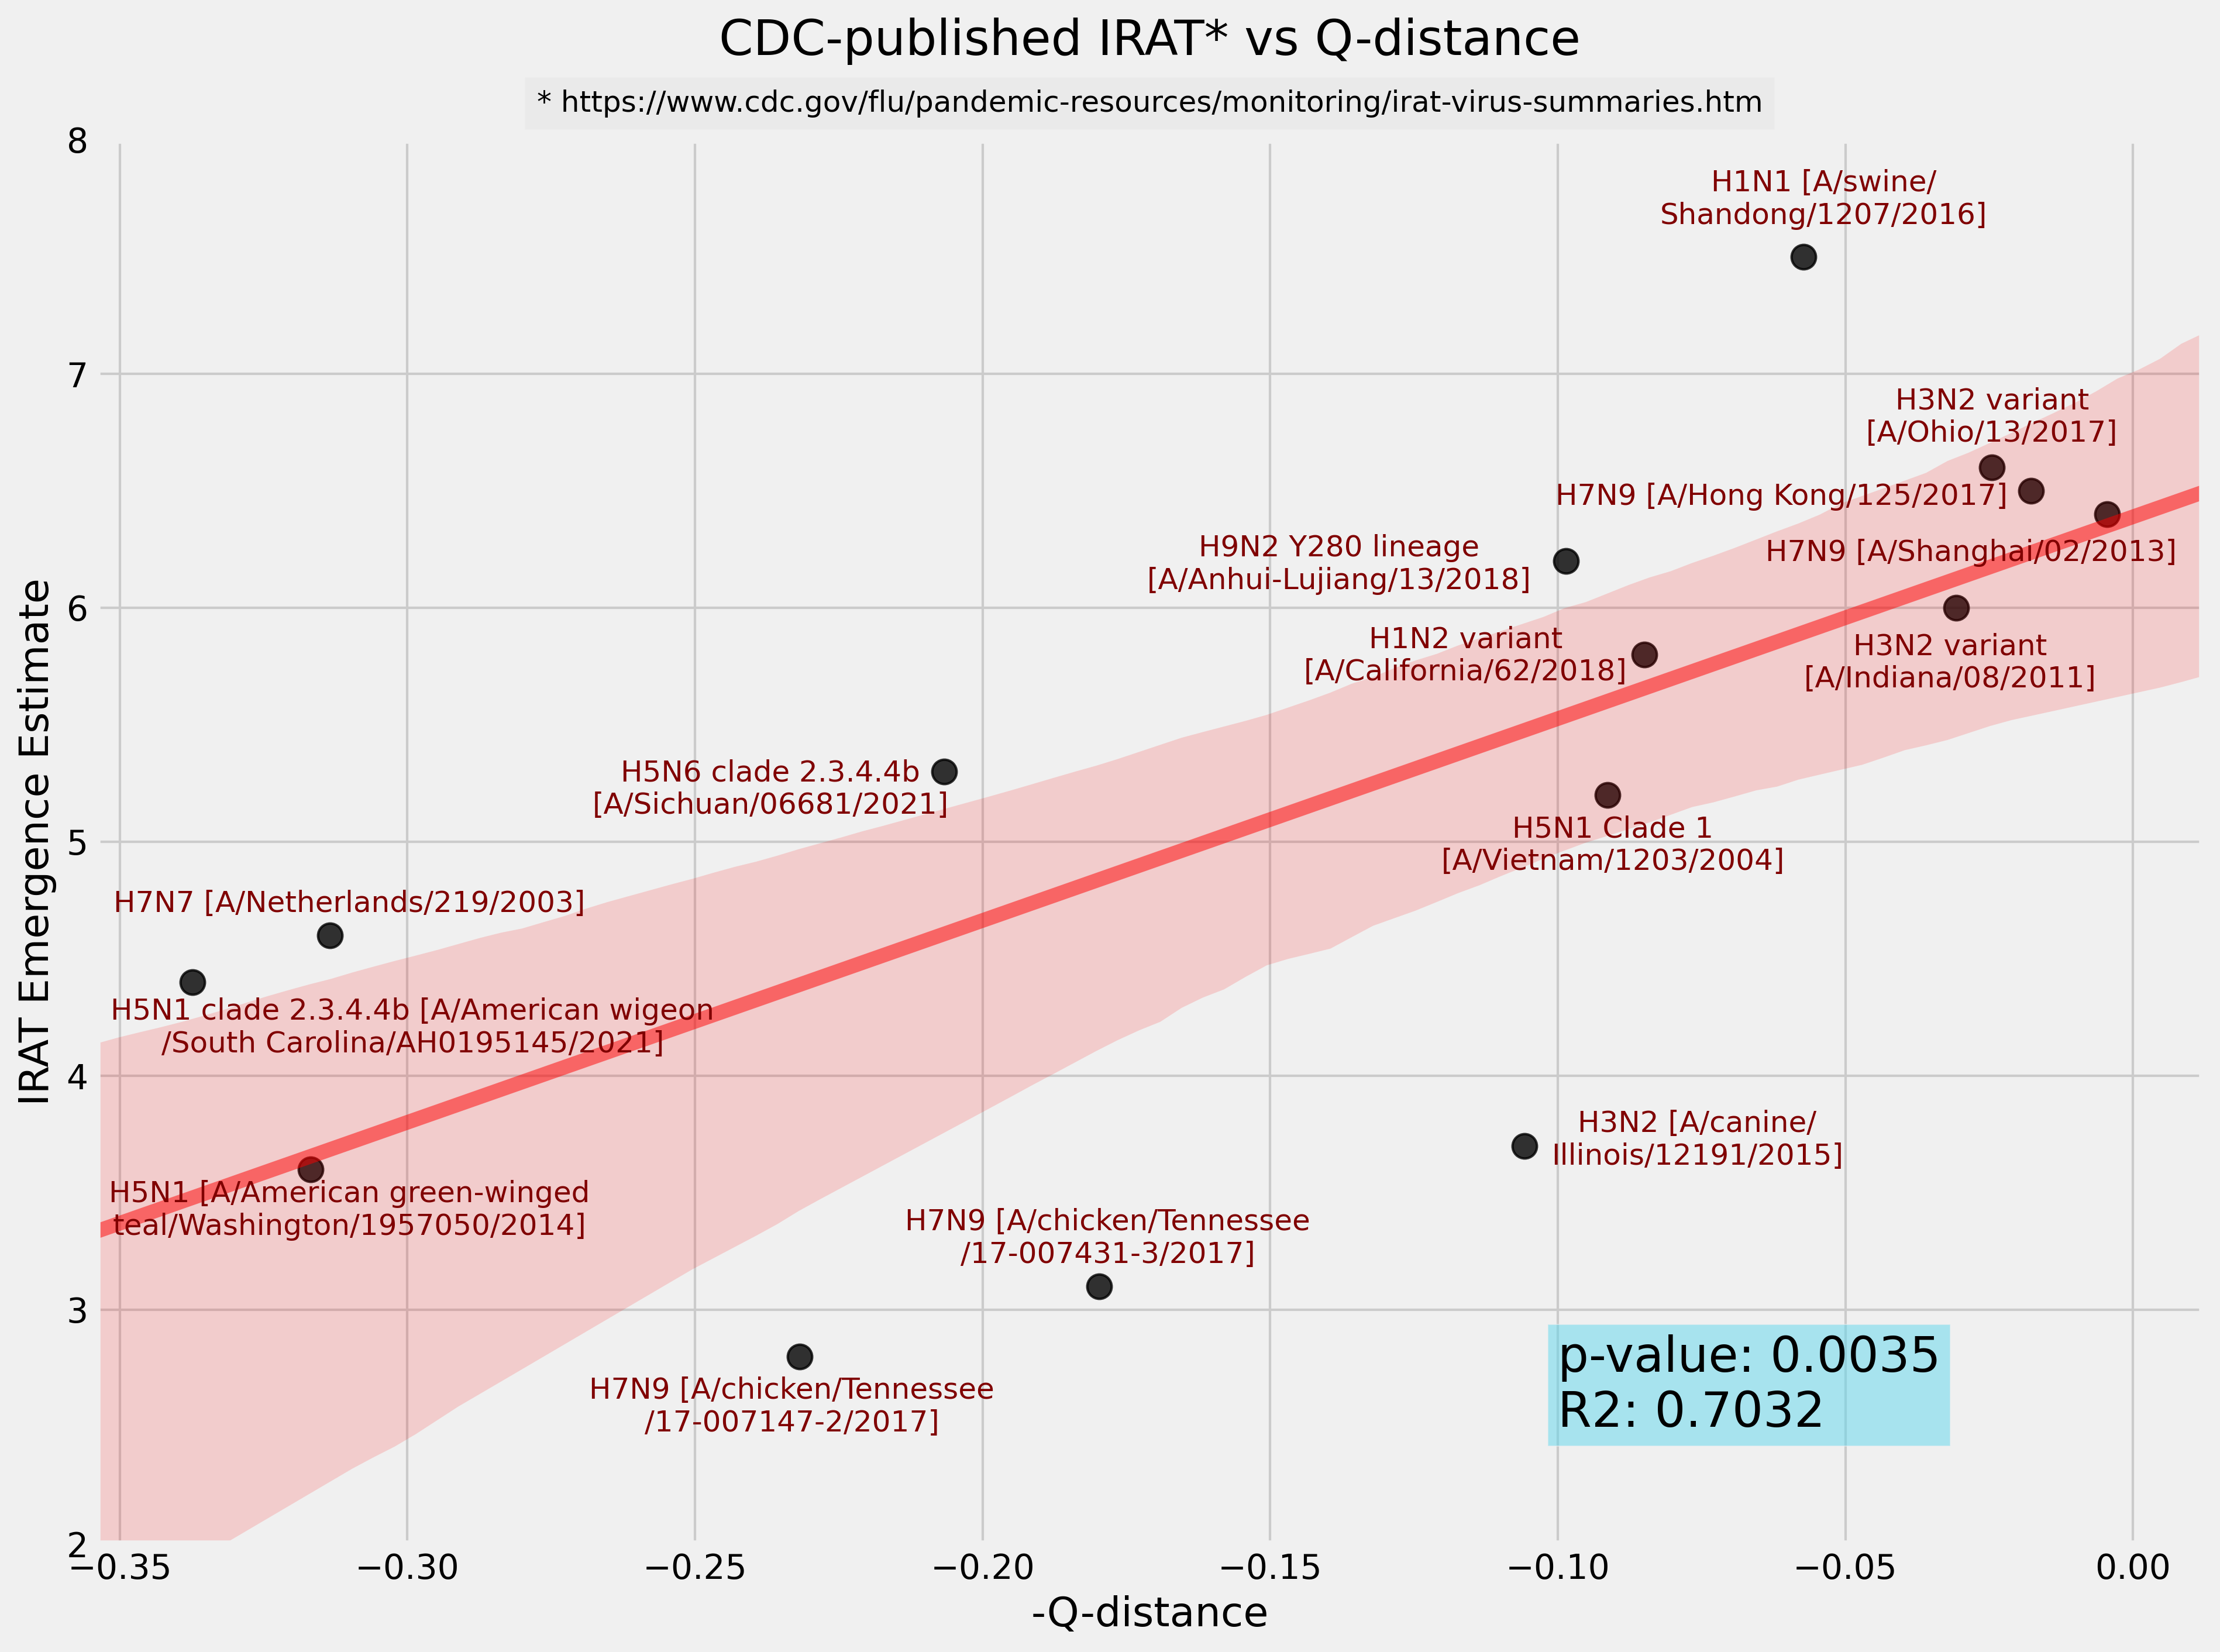

In [3]:
X = df['Both Average Qdistance']
Y = df['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR2: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.33, 0.08, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.2, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.22, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.76, 0.27, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.15, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.45, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.32, 0.52, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.72, 0.48, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.65, 0.615, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.88, 0.61, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.59, 0.68, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.89, 0.7, "H7N9 [A/Shanghai/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.8, 0.74, "H7N9 [A/Hong Kong/125/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.785, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.82, 0.94, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_combined',AXIS=True)

In [4]:
coords_df = df[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = -coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
17,A/chicken/Tennessee/17-007147-2/2017,H7N9,-0.231788,2.8
16,A/chicken/Tennessee/17-007431-3/2017,H7N9,-0.179693,3.1
7,A/American green-winged teal/Washington/195705...,H5N1,-0.316856,3.6
5,A/canine/Illinois/12191/2015,H3N2,-0.105761,3.7
6,A/American wigeon/South Carolina/AH0195145/2021,H5N1,-0.337368,4.4
14,A/Netherlands/219/2003,H7N7,-0.313455,4.6
8,A/Vietnam/1203/2004,H5N1,-0.091342,5.2
10,A/Sichuan/06681/2021,H5N6,-0.206692,5.3
2,A/California/62/2018,H1N2,-0.084926,5.8
4,A/Indiana/08/2011,H3N2,-0.030707,6.0


## H1 and H3
- These strains have a lot more data available than the H5-, H7, and H9- strains

In [5]:
df_h1_h3 = df[(df['Virus Type'][:2]=='H1N1')|(df['Virus Type']=='H1N2')|(df['Virus Type']=='H3N2')]
df_h1_h3.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance
Potential Emergence Estimate,1.000000,0.903205,0.047709,0.047709,0.088108,-0.895120,-0.691605
Potential Impact Estimate,0.903205,1.000000,-0.171067,-0.171067,0.325615,-0.638435,-0.358275
HA Qnet Sample,0.047709,-0.171067,1.000000,1.000000,-0.657303,-0.063839,-0.390257
NA Qnet Sample,0.047709,-0.171067,1.000000,1.000000,-0.657303,-0.063839,-0.390257
HA Average Qdistance,0.088108,0.325615,-0.657303,-0.657303,1.000000,0.068996,0.570570
NA Average Qdistance,-0.895120,-0.638435,-0.063839,-0.063839,0.068996,1.000000,0.858659
Both Average Qdistance,-0.691605,-0.358275,-0.390257,-0.390257,0.570570,0.858659,1.000000


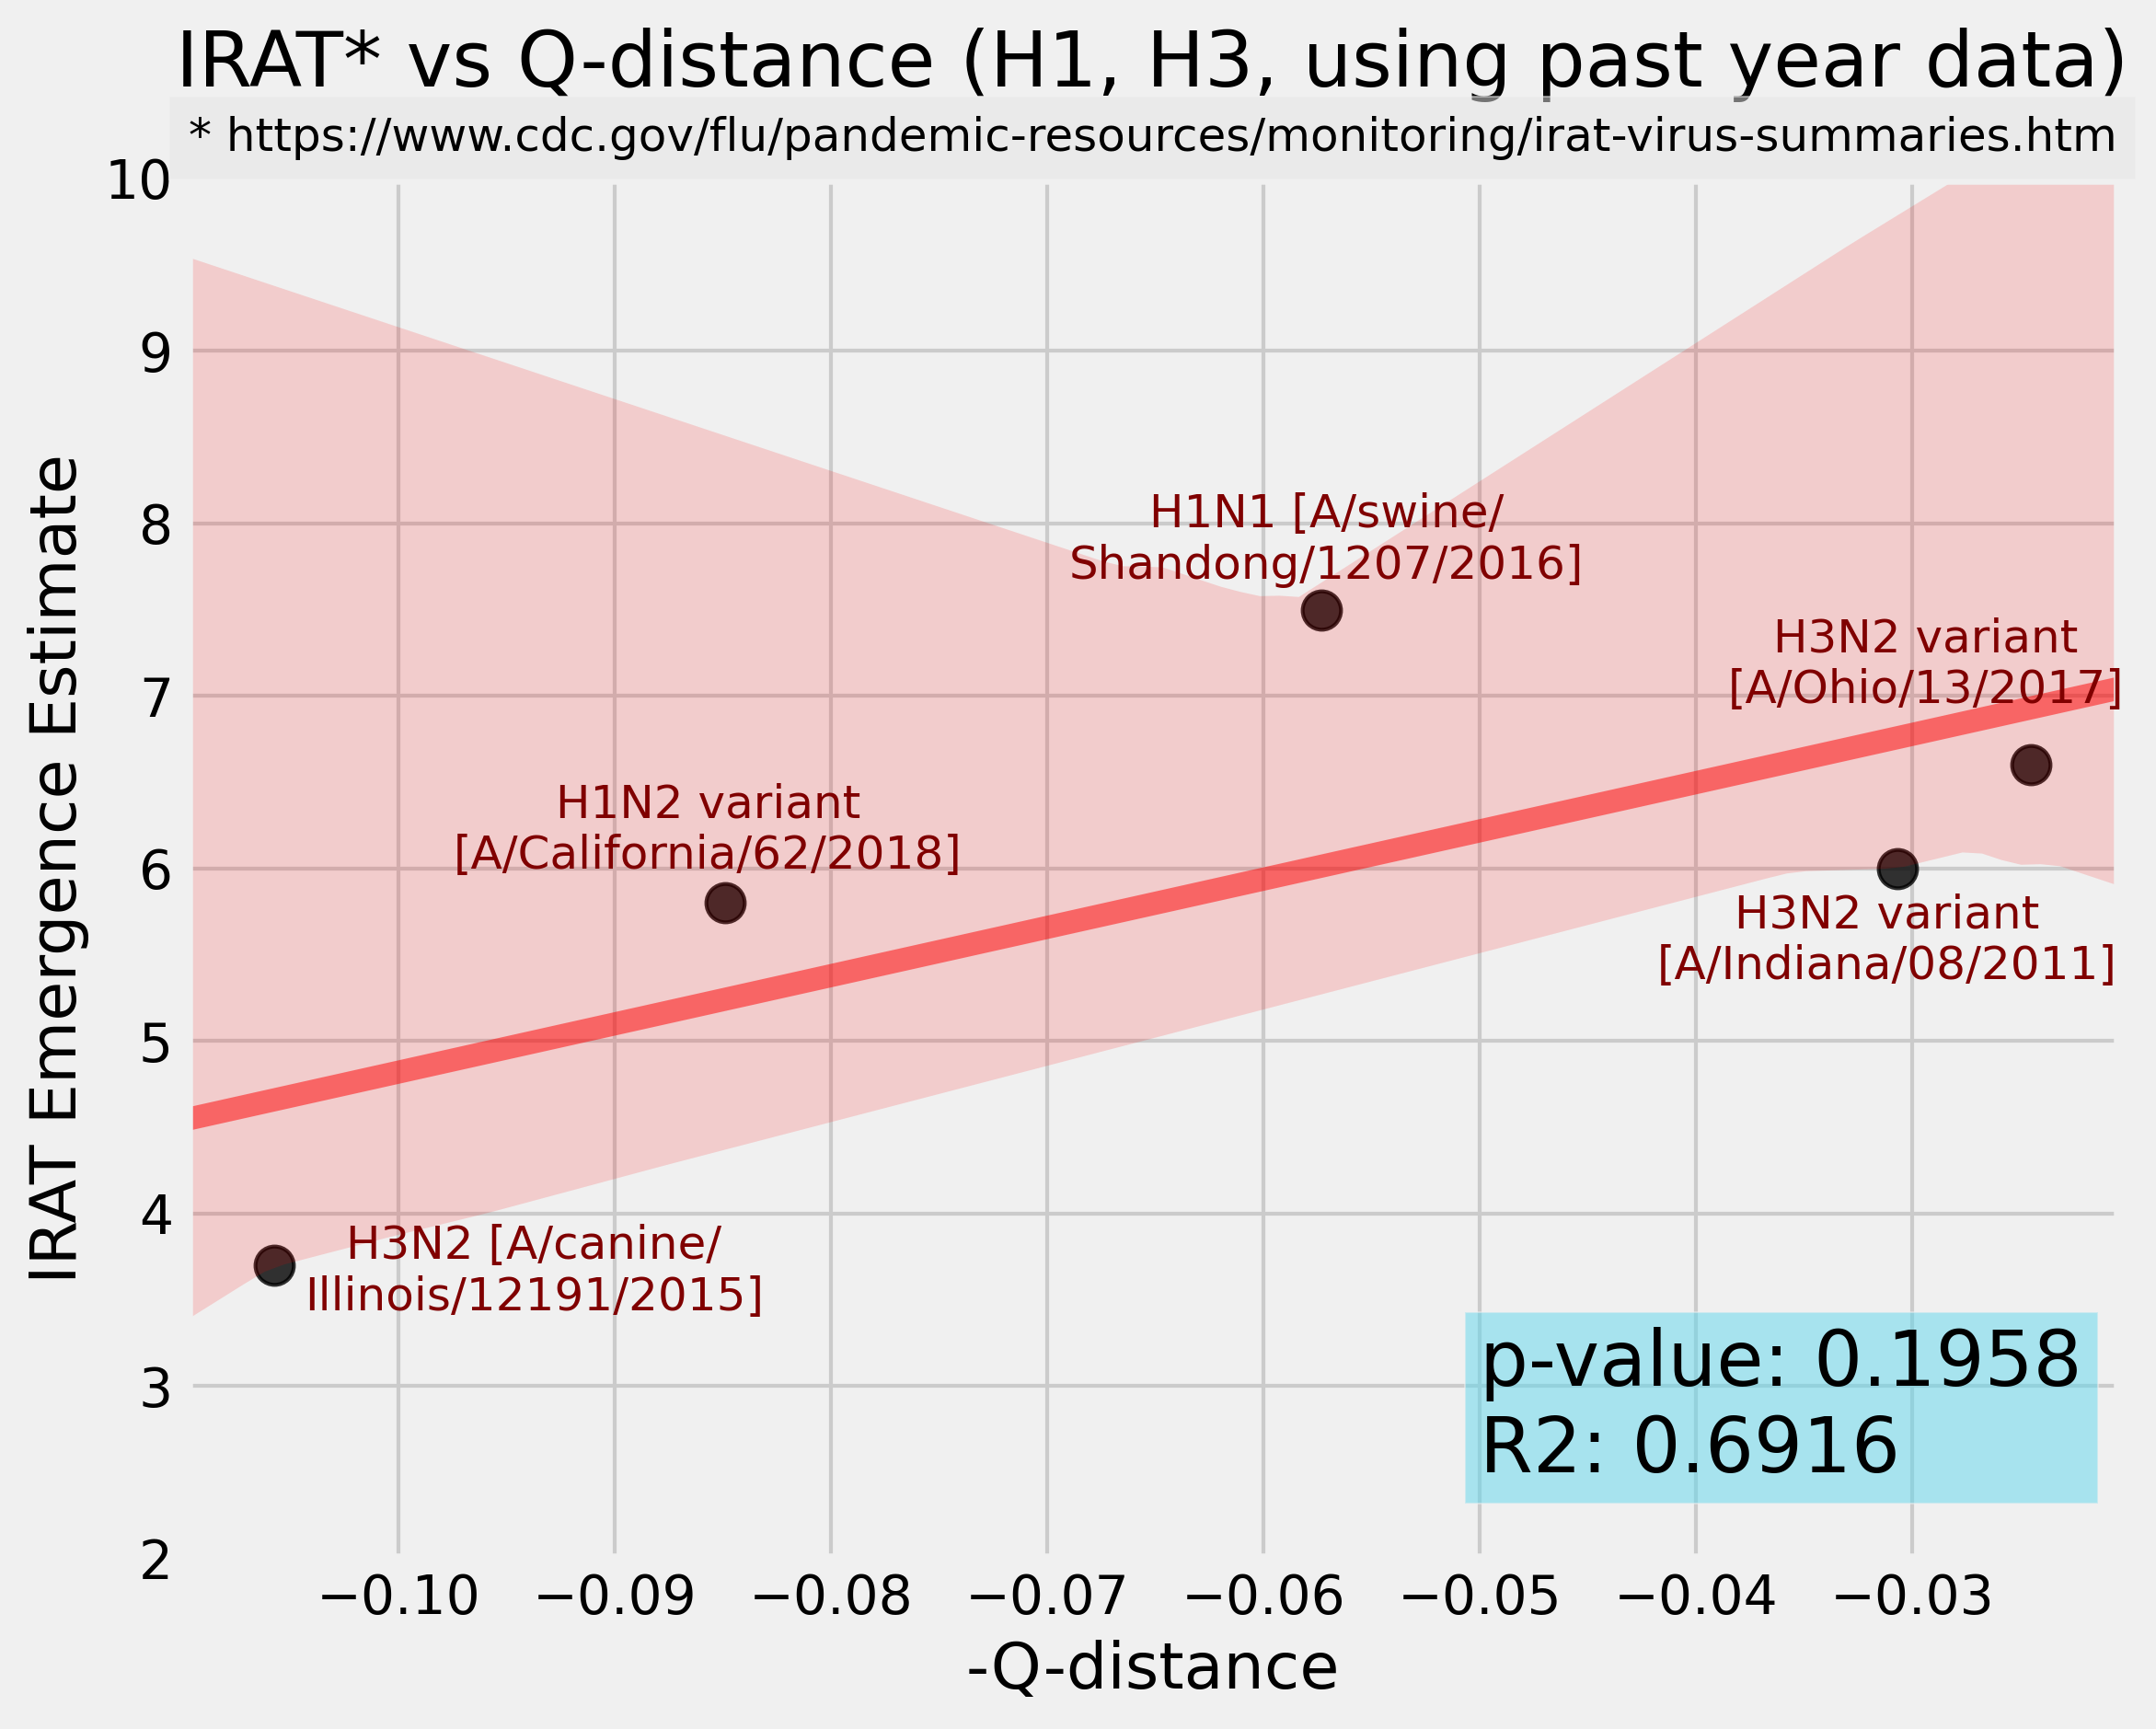

In [6]:
plt.figure(figsize = (7, 5))
X = df_h1_h3['Both Average Qdistance']
Y = df_h1_h3['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.05, 2.5, "p-value: {:5.4f}\nR2: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 10)
ax.set_title('IRAT* vs Q-distance (H1, H3, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.18, 0.18, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.27, 0.5, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.88, 0.42, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.62, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.59, 0.71, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h1_h3',AXIS=True)

In [7]:
coords_df = df_h1_h3[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = -coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
5,A/canine/Illinois/12191/2015,H3N2,-0.105761,3.7
2,A/California/62/2018,H1N2,-0.084926,5.8
4,A/Indiana/08/2011,H3N2,-0.030707,6.0
3,A/Ohio/13/2017,H3N2,-0.024527,6.6
0,A/swine/Shandong/1207/2016,H1N1,-0.057332,7.5


## H5, H7, and H9
- These strains have less sequence data available than the H1- and H3- strains

In [8]:
df_h5_h7_h9 = df[(df['Virus Type']!='H1N1')&(df['Virus Type']!='H1N2')&(df['Virus Type']!='H3N2')]
df_h5_h7_h9.corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance
Potential Emergence Estimate,1.000000,0.945137,-0.538245,-0.533362,-0.441567,-0.652055,-0.703134
Potential Impact Estimate,0.945137,1.000000,-0.491908,-0.488667,-0.267143,-0.690540,-0.650364
HA Qnet Sample,-0.538245,-0.491908,1.000000,0.999545,-0.248292,0.173712,0.015648
NA Qnet Sample,-0.533362,-0.488667,0.999545,1.000000,-0.253228,0.160869,0.003651
HA Average Qdistance,-0.441567,-0.267143,-0.248292,-0.253228,1.000000,0.293928,0.690888
NA Average Qdistance,-0.652055,-0.690540,0.173712,0.160869,0.293928,1.000000,0.894055
Both Average Qdistance,-0.703134,-0.650364,0.015648,0.003651,0.690888,0.894055,1.000000


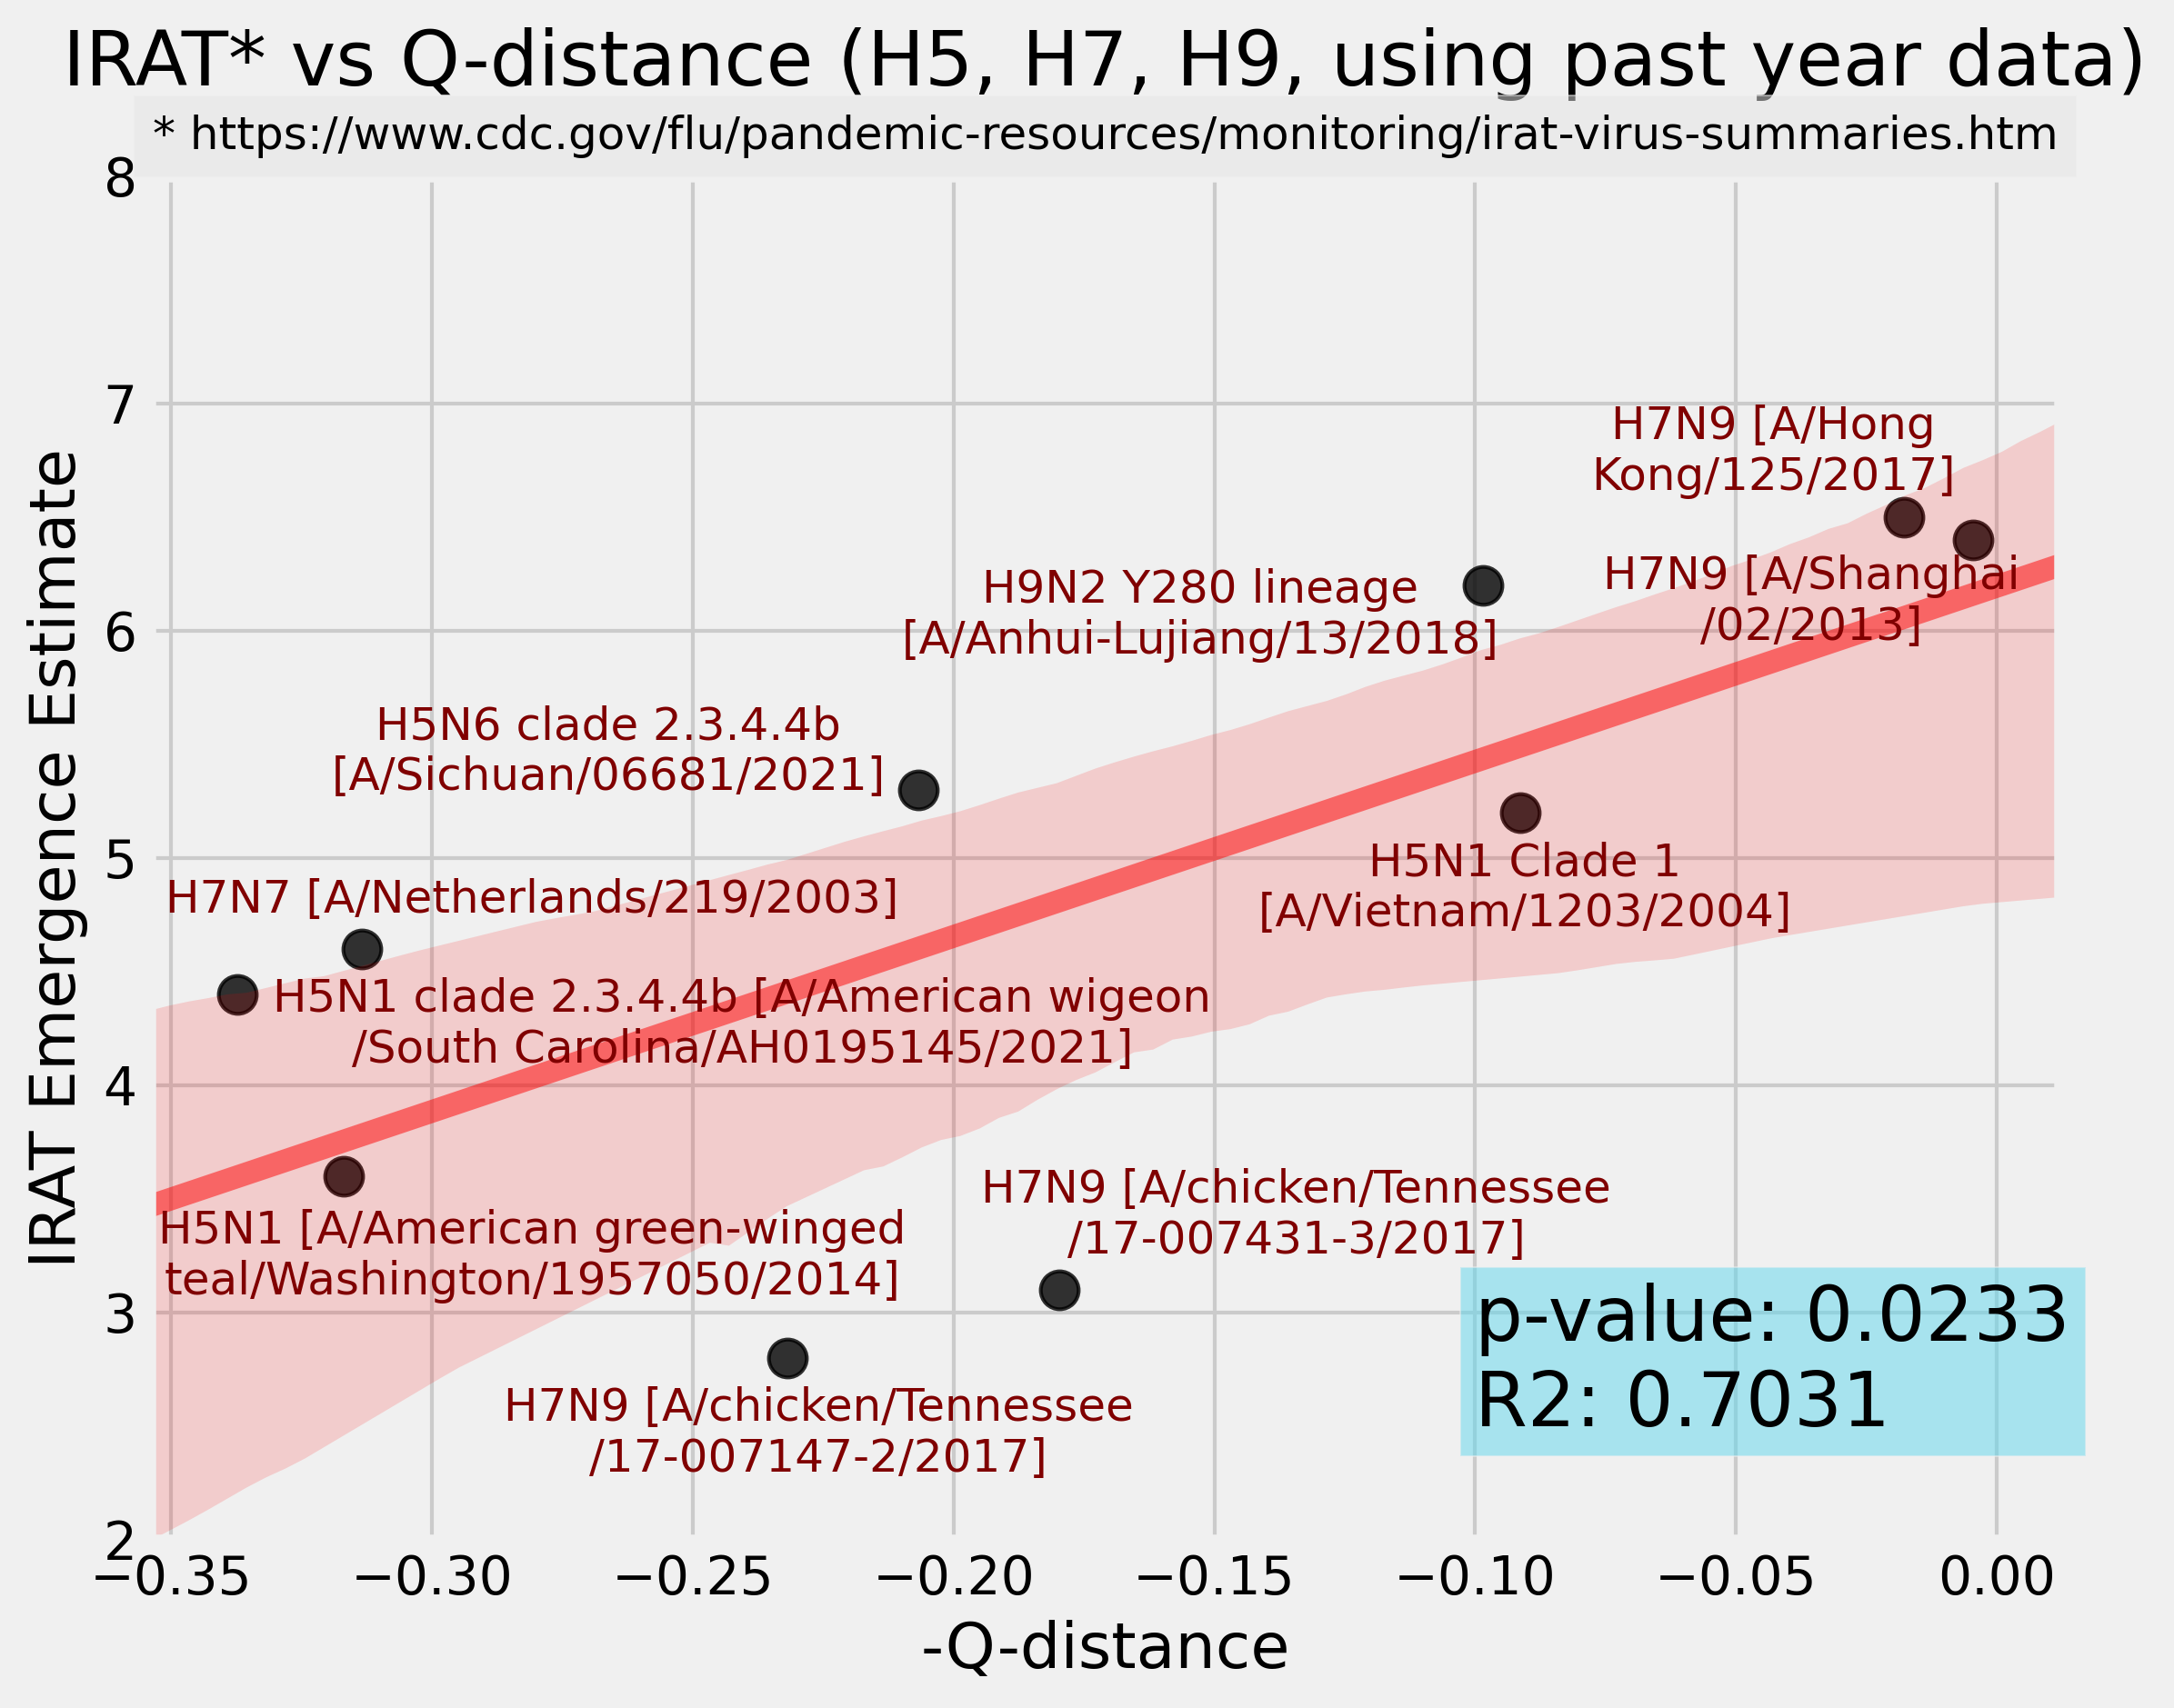

In [9]:
plt.figure(figsize = (7, 5))
X = df_h5_h7_h9['Both Average Qdistance']
Y = df_h5_h7_h9['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR2: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('IRAT* vs Q-distance (H5, H7, H9, using past year data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.35, 0.05, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.6, 0.21, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.2, 0.18, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.31, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.2, 0.46, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.24, 0.55, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.72, 0.45, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.55, 0.65, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.87, 0.66, "H7N9 [A/Shanghai\n/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.85, 0.77, "H7N9 [A/Hong\nKong/125/2017]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_h5_h7_h9',AXIS=True)

In [10]:
coords_df = df_h5_h7_h9[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = -coords_df['Both Average Qdistance']
coords_df

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
17,A/chicken/Tennessee/17-007147-2/2017,H7N9,-0.231788,2.8
16,A/chicken/Tennessee/17-007431-3/2017,H7N9,-0.179693,3.1
7,A/American green-winged teal/Washington/195705...,H5N1,-0.316856,3.6
6,A/American wigeon/South Carolina/AH0195145/2021,H5N1,-0.337368,4.4
14,A/Netherlands/219/2003,H7N7,-0.313455,4.6
8,A/Vietnam/1203/2004,H5N1,-0.091342,5.2
10,A/Sichuan/06681/2021,H5N6,-0.206692,5.3
21,A/Anhui-Lujiang/39/2018,H9N2,-0.098557,6.2
19,A/Shanghai/02/2013,H7N9,-0.004525,6.4
18,A/Hong Kong/125/2017,H7N9,-0.017687,6.5
